# **Spotify Songs Analysis: The Numbers Behind the Songs**

**Zack Dalley and Gracie Stirk**

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb

In [2]:
# Load Data from Github
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [41]:
# Check for null values in df
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [3]:
# Check null values of track name, artist, and album
print(df[df['track_name'].isnull()])
print(df[df['track_artist'].isnull()])
print(df[df['track_album_name'].isnull()])

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP

In [43]:
# Remove the 5 rows from the df where track name, artist, and album are null
# The song popularity level is also 0, so it felt prudent to simply remove the few rows from the dataset
df = df[df['track_name'].notnull()]

In [44]:
# Check for null values in df again
print(df.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [48]:
# Make sure each track_id is a unique value
df['track_id'].nunique() / len(df)

0.8636529791641282

In [4]:
# Check one of the songs with duplicates
df[df['track_id'] == '7qEHsqek33rTcFNT9PFqLf'] 

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
718,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161
1304,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161
18334,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161
19744,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161
23116,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161
30218,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,1,-5.679,1,0.0319,0.751,0.0,0.105,0.446,109.891,182161


It appears that only 86% of all track_ids (songs) are unique. This is because the same songs are appearing on different playlists, duplicating the rows. **For now, we will remove playlist from our dataframe and filter to only unique songs.** Popularity is our target variable, and because popular songs are often repeated in the dataframe more (as they're on many different playlists), not filtering to only unique song values could affect our analysis.

In [5]:
# Remove playlist columns from the dataframe
df = df.drop(columns = ['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'])

# Filter to only unique track_ids
df = df.drop_duplicates(subset=['track_id'])

In [6]:
# Check new proportion of unique track_ids
df['track_id'].nunique() / len(df)

1.0

We now have only unique track_ids (songs) in the dataset.

In [7]:
# Remove the 1 row where tempo is 0 (a song can't have a tempo of 0)
df = df[df['tempo'] != 0]

In [8]:
# Get an idea of the content of each numerical variable
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000,28355.000000
mean,39.331159,0.653395,0.698401,5.368154,-6.817016,0.565473,0.107957,0.177182,0.091120,0.190965,0.510405,120.960446,226583.816646
std,23.701643,0.145736,0.183492,3.613875,3.034139,0.495703,0.102556,0.222804,0.232552,0.155893,0.234324,26.945462,61065.223049
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187743.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.993000,216933.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.999000,254975.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
# Find the total number of unique categories within track_artist
df['track_artist'].nunique()

10691

The only possible categorical variable is track_artist, but there are 10691 different artists included in this dataset. In light of this, it doesn't seem prudent to treat track_artist like a typical categorical variable. We will continue on with the analysis for now, but we may do something like take the top 100 artists and then create an "other" column for the remaining artists so that the analysis is feasible.

<Axes: >

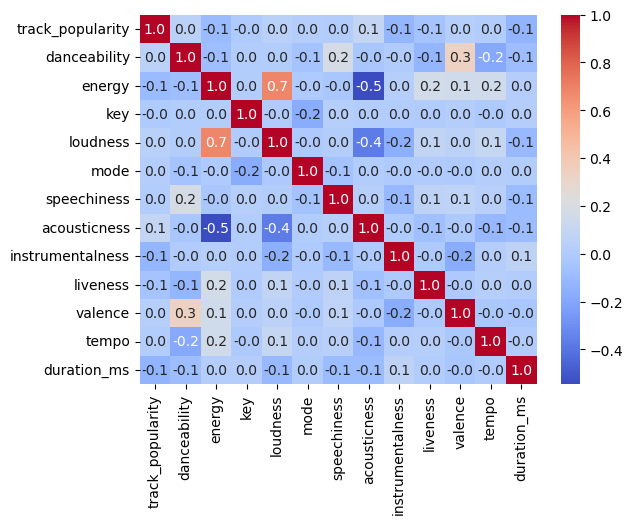

In [ ]:
# Correlation Matrix
#all the quantitative features
df_num = df[['track_popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
correlation_matrix = df_num.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

The correlation across the board is pretty low, which will be good for us since we don't have to worry about multicollinearity. The only correlation we can see is the correlation between loudness and energy and the correlation between acousticness and energy, so we'll keep an eye on that as we do our analysis.

Text(0.5, 1.0, 'Key of the Song')

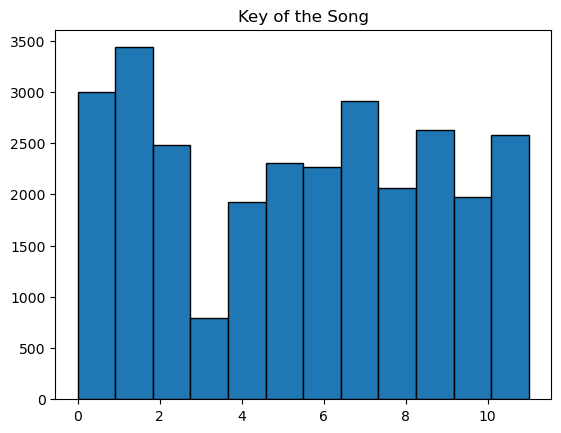

In [20]:
# At least 2 insightful visualizations and their descriptions
plt.pyplot.hist(df['key'],edgecolor='black',bins=12)
plt.pyplot.title('Key of the Song')

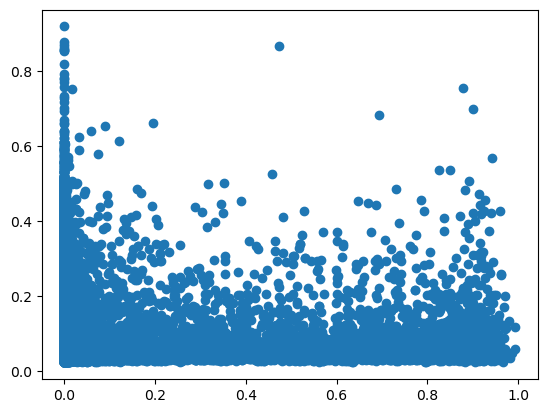

In [23]:
plt.pyplot.scatter(df['instrumentalness'],df['speechiness'])

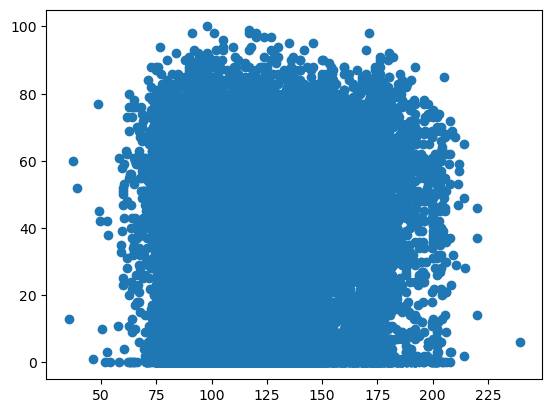

In [24]:
plt.pyplot.scatter(df['tempo'],df['track_popularity'])

Text(0.5, 1.0, 'Tempo of Songs in the Top 100')

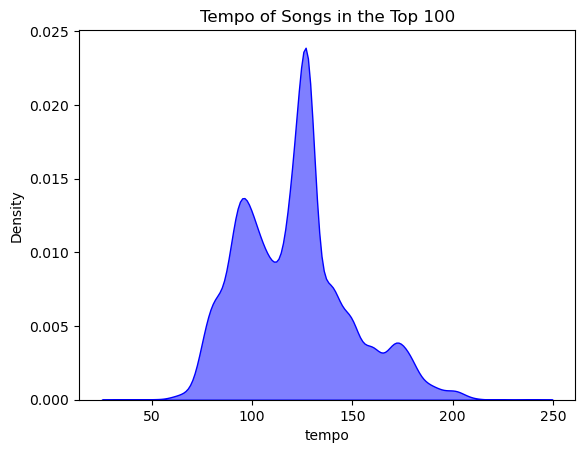

In [26]:
sb.kdeplot(df['tempo'], color='blue', fill=True, alpha=0.5)
plt.pyplot.title('Tempo of Songs in the Top 100')

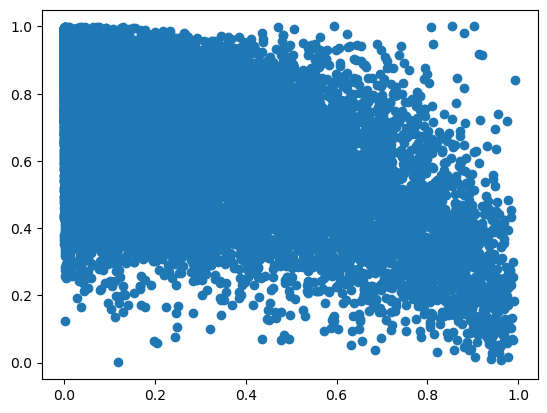

In [27]:
plt.pyplot.scatter(df['acousticness'],df['energy'])

Text(0, 0.5, 'Energy')

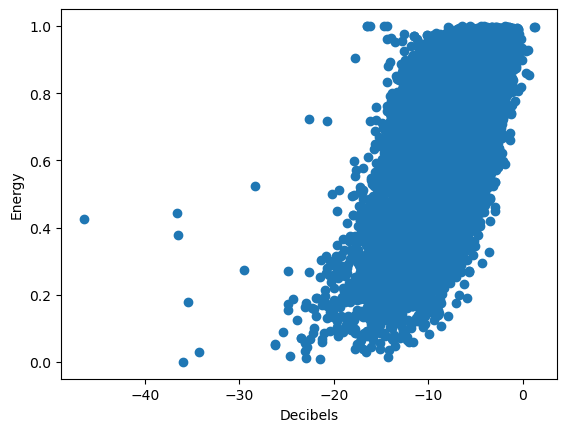

In [30]:
plt.pyplot.scatter(df['loudness'],df['energy'])
plt.pyplot.xlabel('Decibels')
plt.pyplot.ylabel('Energy')